In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import scipy.sparse as sp
from collections import Counter
import os

In [104]:
def merge_csv_files(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    dataframes = [pd.read_csv(file) for file in all_files]
    merged_df = pd.concat(dataframes, ignore_index=True)
    return merged_df

In [105]:
labelled_folder = r"C:\github\news\news\german-news\preprocess data\data_ready_for_analysis\labelled"

In [106]:
labelled_data = merge_csv_files(labelled_folder)

In [107]:
labelled_data

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574.0,True,"[1, 1, 1, 0]"
1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226.0,True,"[1, 1, 0, 0]"
2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071.0,True,"[0, 1, 0, 0]"
3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655.0,True,"[0, 0, 0, 1]"
4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447.0,True,"[0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,welt,https://www.welt.de/politik/ausland/article242...,"krieg, christ, ss, sp, ukraine, ns, spo, nazi,...",2022-12-12,2022-12-12,2024-10-20,NaN,NaN,"Newsteam, Russland-Ukraine-Krieg (24.2.2022), ...",Ukraine-News ++ Ukraines Verteidigungsminister...,Laut dem ukrainischen Verteidigungsminister bi...,Laut dem ukrainischen Verteidigungsminister bi...,0.0,0.0,0.0,1.0,21564.0,True,"[0, 0, 0, 1]"
311,welt,https://www.welt.de/politik/deutschland/articl...,"sp, terror, ns, spd, schi, rechtsextremismus, ss",2022-12-13,2022-12-13,2024-10-20,NaN,NaN,"Newsteam, Wehrbeauftragte, Hoegl, Eva, Reichsb...",Wehrbeauftragte fordert haerteres Vorgehen geg...,Nach der Razzia gegen ein mutmassliches Terror...,Nach der Razzia gegen ein mutmassliches Terror...,0.0,0.0,0.0,1.0,972.0,True,"[0, 0, 0, 1]"
312,welt,https://www.welt.de/politik/ausland/article242...,"krieg, sp, ukraine, ns, spd, rki, schi, ss, rn...",2022-12-10,2022-12-10,2024-10-20,NaN,NaN,"Newsteam, Leopard 2, Russland-Ukraine-Krieg (2...",Leopard 2: USA fuer Lieferung deutscher Kampfp...,Kanzler Scholz will moderne westliche Kampfpan...,Kanzler Scholz will moderne westliche Kampfpan...,0.0,0.0,0.0,1.0,2616.0,True,"[0, 0, 0, 1]"
313,welt,https://www.welt.de/politik/deutschland/articl...,"terror, ss, ns",2022-12-13,2022-12-13,2024-10-20,NaN,NaN,"Schindler-Frederik, Bundestag WELT, AfD, Razzi...",Reichsbuerger-Razzia: Ermittler finden 93 Waff...,Bei der bundesweiten Razzia gegen eine Reichsb...,Bei der bundesweiten Razzia gegen eine Reichsb...,0.0,0.0,0.0,1.0,1464.0,True,"[0, 0, 0, 1]"


In [108]:
validation_data = labelled_data.sample(n=25, random_state=42)
remaining_data = labelled_data.drop(validation_data.index)

In [109]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
validation_data[labels].sum()

Fake News        2.0
Extreme bias     7.0
clickbait        9.0
credible        19.0
dtype: float64

In [110]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
remaining_data[labels].sum()

Fake News        56.0
Extreme bias     75.0
clickbait        83.0
credible        211.0
dtype: float64

In [111]:
unlabelled_folder = r"C:\github\news\news\german-news\preprocess data\data_ready_for_analysis\unlabelled"

In [112]:
unlabelled_data = merge_csv_files(unlabelled_folder)

In [113]:
X = remaining_data[['title', 'description', 'body']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
y = remaining_data[['Fake News', 'Extreme bias', 'clickbait', 'credible']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
X.head()

0    Sie verspottete Deutsche als Kartoffeln: Aktiv...
1    Reporter als Terror-Helfer: Die perfide Propag...
2    Streit in der CDU: Umfrage-Schlacht zwischen M...
3    Shani Louk ermordet  Scholz: Zeigt die ganze B...
4    Sachsen: Nur jede dritte Abschiebung findet wi...
dtype: object

In [115]:
y_train[labels].sum()

Fake News        46.0
Extreme bias     63.0
clickbait        64.0
credible        166.0
dtype: float64

In [116]:
y_test[labels].sum()

Fake News       10.0
Extreme bias    12.0
clickbait       19.0
credible        45.0
dtype: float64

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000) #must be same as val features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [129]:
X_train_tfidf.shape

(232, 3000)

In [130]:
X_test_tfidf.shape

(58, 3000)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

input_shape = X_train_tfidf.shape[1]
num_labels = y_train.shape[1]

# model architecture
model = Sequential([
    Dense(1024, input_shape=(input_shape,), activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_labels, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model summary
model.summary() 

c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │     3,073,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,730,180 (14.23 MB)

 Trainable params: 3,730,180 (14.23 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
history = model.fit(X_train_tfidf.toarray(), y_train.values, epochs=100, validation_split=0.4, callbacks=[early_stopping])

Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2404 - loss: 0.6928 - val_accuracy: 0.4624 - val_loss: 0.6914
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2487 - loss: 0.6932 - val_accuracy: 0.4839 - val_loss: 0.6908
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2591 - loss: 0.6918 - val_accuracy: 0.5484 - val_loss: 0.6903
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3495 - loss: 0.6906 - val_accuracy: 0.6022 - val_loss: 0.6898
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3901 - loss: 0.6899 - val_accuracy: 0.6774 - val_loss: 0.6892
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4049 - loss: 0.6904 - val_accuracy: 0.6774 - val_loss: 0.6887
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3554 - loss: 0.6898 - val_accuracy: 0.6774 - val_loss: 0.6882
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4329 - loss: 0.6895 - val_accuracy: 0.6774 - val_loss: 0.6877
Epoc

In [ ]:
#model.save('model.h5')  

# To load the model later and resume training:
#from tensorflow.keras.models import load_model
#model = load_model('/kaggle/input/multiclass_seq/keras/default/1/model.h5')

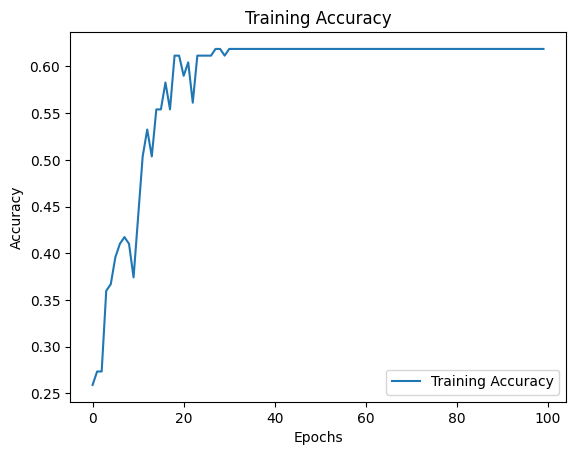

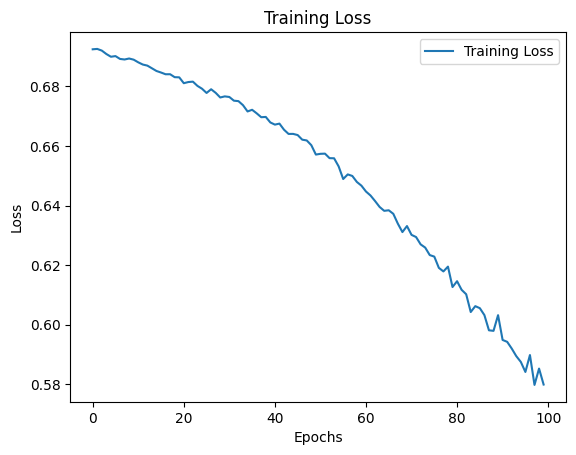

In [146]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test.values)
print(f'Test Accuracy= {round(test_accuracy,2)*100}%\nTest Loss= {round(test_loss,2)}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 0.5830 
Test Accuracy= 66.0%
Test Loss= 0.58


In [ ]:
report = classification_report(np.array(y_test.tolist()[:-3]), test_pred.round())
print(report)

Predict on new data

we try it on the validation data

In [148]:
validation_data.head()
vectorizer = TfidfVectorizer(max_features=3000)
X_val = validation_data[['title', 'description', 'body']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
y_val = validation_data[['Fake News', 'Extreme bias', 'clickbait', 'credible']]

In [149]:
X_val_tfidf = vectorizer.fit_transform(X_val)
#predictions = model.predict(X_val_tfidf.toarray())
X_val_tfidf.shape

(25, 3000)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_val_tfidf.toarray(), y_val.values)
print(f'Validation Accuracy= {round(test_accuracy,2)*100}%\Validation Loss= {round(test_loss,2)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5600 - loss: 0.5926
Test Accuracy= 56.00000000000001%
Test Loss= 0.59


In [151]:
predictions = model.predict(X_val_tfidf.toarray())
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.33016592, 0.38348728, 0.40419954, 0.5918561 ],
       [0.36381283, 0.40998104, 0.41810188, 0.57535696],
       [0.33832532, 0.38544694, 0.40362304, 0.58998823],
       [0.34546077, 0.38869926, 0.41203144, 0.580623  ],
       [0.34545577, 0.38967064, 0.4123943 , 0.58036685],
       [0.31591856, 0.38393372, 0.39451742, 0.5964434 ],
       [0.33738494, 0.38593218, 0.4022882 , 0.58689785],
       [0.3480906 , 0.40051177, 0.41355732, 0.5816686 ],
       [0.34684312, 0.39528194, 0.4137637 , 0.57893074],
       [0.35407707, 0.3983281 , 0.41660017, 0.5767112 ],
       [0.3403378 , 0.383361  , 0.40268523, 0.5916075 ],
       [0.3463083 , 0.39287066, 0.41393873, 0.58537287],
       [0.35961488, 0.39755547, 0.41686568, 0.579239  ],
       [0.34846526, 0.4019861 , 0.40561908, 0.5792451 ],
       [0.35059398, 0.39794457, 0.41397732, 0.57655305],
       [0.3264092 , 0.38153824, 0.39066774, 0.5939834 ],
       [0.34413975, 0.3974904 , 0.41215423, 0.58072627],
       [0.32561928, 0.37754968,

This is a bit better than the other classical approaches